## Aggregate the network with an optimization method

In [1]:
import sys
sys.path.append('../src')
import utils
import models as m

In [2]:
lines_df, nodes_df, wind_df, solar_df = utils.import_data()
TimeSeries = {'wind': wind_df, 'solar': solar_df};

In [3]:
network = utils.Network(nodes_df, TimeSeries, lines_df)

The 'features' dictionary has been created and can be accessed as '.features'
It is a dictionary with keys for each node in range(0, 17).
Each value is a dictionary with the features of that node.

Example structure:
network.features[0].keys() = dict_keys(['position', 'time_series', 'duration_curves', 'correlation'])

Details:
  - Position: A tuple (latitude, longitude) of that node.
  - Time series: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the time series itself.
  - Duration Curves: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the duration curve of the time series.
  - Correlation: A dictionary with keys as tuples of types of time series
    and values as correlation factors between those time series.


In [4]:
node_features = network.features;

In [5]:
n_repr = 5
opti = m.AggregationOptimizer(node_features, n_repr)

In [6]:
u_results, z_results = opti.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-06
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 307 rows, 306 columns and 884 nonzeros
Model fingerprint: 0x6e2898fb
Variable types: 0 continuous, 306 integer (306 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 3e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Presolve time: 0.02s
Presolved: 307 rows, 306 columns, 884 nonzeros
Variable types: 0 continuous, 306 integer (306 binary)
Found heuristic solution: objective 12.8144494

Root relaxation: objective 7.939375e+00, 86 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Dep

In [ ]:
visuals = utils.Visualization(network, u_results, save_fig=True)

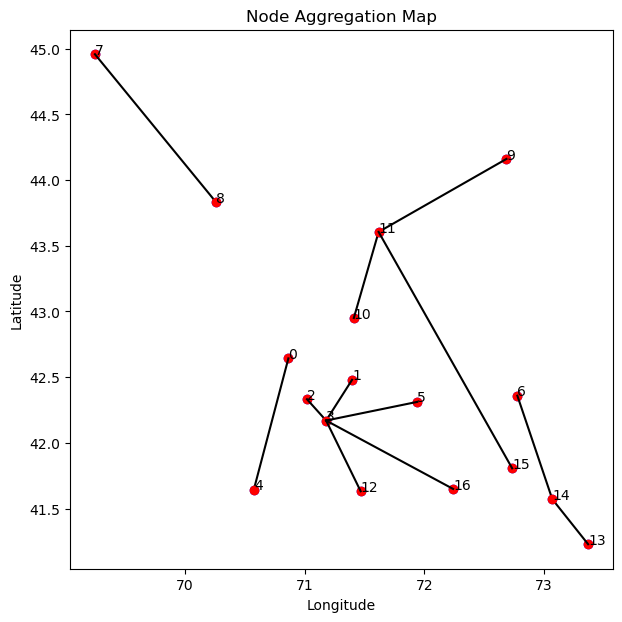

Figure saved as node_aggregation_map_17_to_17.png at ../results/


<Figure size 640x480 with 0 Axes>

In [8]:
visuals.plot_map()